In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
#!/usr/bin/env python
# coding: utf-8

# In[1]:


import os
import math
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
from sklearn.utils import shuffle
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras.models import Sequential
from keras.layers import Activation, Dense, Flatten
from sklearn.model_selection import train_test_split




path = os.listdir('/content/drive/MyDrive/BRTcom')
path_name = '/content/drive/MyDrive/BRTcom/Training'




classes = ['glioma','meningioma','notumor','pituitary']
def obtain_data(X,Y,path):
    for i in classes:
        path_new = os.path.join(path,i)
        for j in os.listdir(path_new):
            img = cv2.imread(os.path.join(path_new,j))
            img = cv2.resize(img,(128,128))
            X.append(img)
            Y.append(i)





images = []
labels = []
obtain_data(images,labels,path_name)




images = np.array(images)
labels = np.array(labels)
X_train,X_test,Y_train,Y_test = train_test_split(images, labels, test_size=0.2)





X_train,Y_train = shuffle(X_train,Y_train,random_state=101)
y_train_new = []
for i in Y_train:
    y_train_new.append(classes.index(i))
Y_train = y_train_new
Y_train = tf.keras.utils.to_categorical(Y_train)
y_test_new = []
for i in Y_test:
    y_test_new.append(classes.index(i))
Y_test = y_test_new
Y_test = tf.keras.utils.to_categorical(Y_test)


# Converging Path :


inputs = tf.keras.layers.Input((128,128,3))
s = tf.keras.layers.Lambda(lambda x:x/255)(inputs)
c1 = tf.keras.layers.Conv2D(16,(3,3),activation='relu',kernel_initializer='he_normal',padding='same')(s)
c1 = tf.keras.layers.Dropout(0.2)(c1)
c1 = tf.keras.layers.Conv2D(16,(3,3),activation='relu',kernel_initializer='he_normal',padding='same')(c1)
p1 = tf.keras.layers.MaxPooling2D(pool_size=(2,2))(c1)





c2 = tf.keras.layers.Conv2D(32,(3,3),activation='relu',kernel_initializer='he_normal',padding='same')(p1)
c2 = tf.keras.layers.Dropout(0.3)(c2)
c2 = tf.keras.layers.Conv2D(32,(3,3),activation='relu',kernel_initializer='he_normal',padding='same')(c2)
p2 = tf.keras.layers.MaxPooling2D(pool_size=(2,2))(c2)





c3 = tf.keras.layers.Conv2D(64,(3,3),activation='relu',kernel_initializer='he_normal',padding='same')(p2)
c3 = tf.keras.layers.Dropout(0.2)(c3)
c3 = tf.keras.layers.Conv2D(64,(3,3),activation='relu',kernel_initializer='he_normal',padding='same')(c3)
p3 = tf.keras.layers.MaxPooling2D(pool_size=(2,2))(c3)




c4 = tf.keras.layers.Conv2D(128,(3,3),activation='relu',kernel_initializer='he_normal',padding='same')(p3)
c4 = tf.keras.layers.Dropout(0.2)(c4)
c4 = tf.keras.layers.Conv2D(128,(3,3),activation='relu',kernel_initializer='he_normal',padding='same')(c4)
p4 = tf.keras.layers.MaxPooling2D(pool_size=(2,2))(c4)





c5 = tf.keras.layers.Conv2D(256,(3,3),activation='relu',kernel_initializer='he_normal',padding='same')(p4)
c5 = tf.keras.layers.Dropout(0.2)(c5)
c5 = tf.keras.layers.Conv2D(256,(3,3),activation='relu',kernel_initializer='he_normal',padding='same')(c5)


# Expansive Path:



u6 = tf.keras.layers.Conv2DTranspose(128,(2,2),strides=(2,2),padding='same')(c5)
u6 = tf.keras.layers.concatenate([u6,c4])
c6 = tf.keras.layers.Conv2D(128,(3,3),activation='relu',kernel_initializer='he_normal',padding='same')(u6)
c6 = tf.keras.layers.Dropout(0.3)(c6)
c6 = tf.keras.layers.Conv2D(128,(3,3),activation='relu',kernel_initializer='he_normal',padding='same')(c6)





u7 = tf.keras.layers.Conv2DTranspose(64,(2,2),strides=(2,2),padding='same')(c6)
u7 = tf.keras.layers.concatenate([u7,c3])
c7 = tf.keras.layers.Conv2D(64,(3,3),activation='relu',kernel_initializer='he_normal',padding='same')(u7)
c7 = tf.keras.layers.Dropout(0.3)(c7)
c7 = tf.keras.layers.Conv2D(64,(3,3),activation='relu',kernel_initializer='he_normal',padding='same')(c7)





u8 = tf.keras.layers.Conv2DTranspose(32,(2,2),strides=(2,2),padding='same')(c7)
u8 = tf.keras.layers.concatenate([u8,c2])
u8 = tf.keras.layers.Dropout(0.2)(u8)
c8 = tf.keras.layers.Conv2D(32,(3,3),activation='relu',kernel_initializer='he_normal',padding='same')(u8)
c8 = tf.keras.layers.Dropout(0.2)(c8)
c8 = tf.keras.layers.Conv2D(32,(3,3),activation='relu',kernel_initializer='he_normal',padding='same')(c8)





u9 = tf.keras.layers.Conv2DTranspose(16,(2,2),strides=(2,2),padding='same')(c8)
u9 = tf.keras.layers.concatenate([u9,c1])
c9 = tf.keras.layers.Conv2D(16,(3,3),activation='relu',kernel_initializer='he_normal',padding='same')(u9)
c9 = tf.keras.layers.Dropout(0.2)(c9)
c9 = tf.keras.layers.Conv2D(16,(3,3),activation='relu',kernel_initializer='he_normal',padding='same')(c9)




c10 = tf.keras.layers.Conv2D(4,(1,1),activation='relu',kernel_regularizer=tf.keras.regularizers.L2(0.01))(c9)
c10 = tf.keras.layers.Dropout(0.3)(c10)
c10= tf.keras.layers.Flatten()(c10)
c12= tf.keras.layers.Dense(512,kernel_regularizer=tf.keras.regularizers.L2(0.01),activity_regularizer=tf.keras.regularizers.L1(0.01))(c10)
c12 = tf.keras.layers.Dropout(0.2)(c12)
outputs = tf.keras.layers.Dense(4,activation = 'softmax')(c12)





model = tf.keras.Model(inputs=[inputs],outputs=[outputs])
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'], sample_weight_mode='temporal')
model.summary()






callbacks = [tf.keras.callbacks.ModelCheckpoint('BRAIN_TUMOR_CLASSIFIER_MODEL.h5',verbose=1,save_best_only=True),
             tf.keras.callbacks.EarlyStopping(monitor='val_loss',min_delta=0.01,patience=20,verbose=1),
             tf.keras.callbacks.TensorBoard(log_dir='logs')]




results = model.fit(X_train,Y_train,validation_split=0.25,batch_size=50,epochs=100,callbacks=callbacks)


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 128, 128, 3)]        0         []                            
                                                                                                  
 lambda (Lambda)             (None, 128, 128, 3)          0         ['input_1[0][0]']             
                                                                                                  
 conv2d (Conv2D)             (None, 128, 128, 16)         448       ['lambda[0][0]']              
                                                                                                  
 dropout (Dropout)           (None, 128, 128, 16)         0         ['conv2d[0][0]']              
                                                                                              

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


69/69 [==============================] - 39s 264ms/step - loss: 8.9151 - accuracy: 0.4924 - val_loss: 3.0806 - val_accuracy: 0.2288
Epoch 2/100
69/69 [==============================] - ETA: 0s - loss: 2.0966 - accuracy: 0.6302
Epoch 2: val_loss improved from 3.08061 to 2.15469, saving model to BRAIN_TUMOR_CLASSIFIER_MODEL.h5
69/69 [==============================] - 14s 206ms/step - loss: 2.0966 - accuracy: 0.6302 - val_loss: 2.1547 - val_accuracy: 0.4341
Epoch 3/100
69/69 [==============================] - ETA: 0s - loss: 1.6456 - accuracy: 0.7194
Epoch 3: val_loss improved from 2.15469 to 1.66192, saving model to BRAIN_TUMOR_CLASSIFIER_MODEL.h5
69/69 [==============================] - 13s 194ms/step - loss: 1.6456 - accuracy: 0.7194 - val_loss: 1.6619 - val_accuracy: 0.5572
Epoch 4/100
69/69 [==============================] - ETA: 0s - loss: 1.4351 - accuracy: 0.7698
Epoch 4: val_loss improved from 1.66192 to 1.51668, saving model to BRAIN_TUMOR_CLASSIFIER_MODEL.h5
69/69 [============

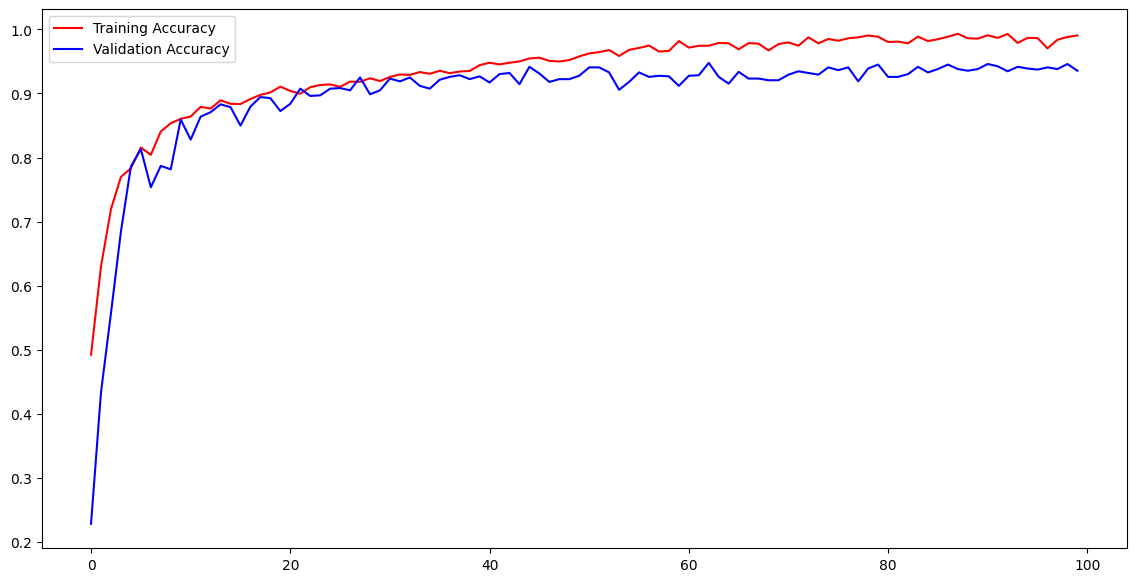

In [3]:
acc = results.history['accuracy']
val_acc = results.history['val_accuracy']
epochs = range(len(acc))
fig = plt.figure(figsize=(14,7))
plt.plot(epochs,acc,'r',label="Training Accuracy")
plt.plot(epochs,val_acc,'b',label="Validation Accuracy")
plt.legend(loc='upper left')
plt.show()


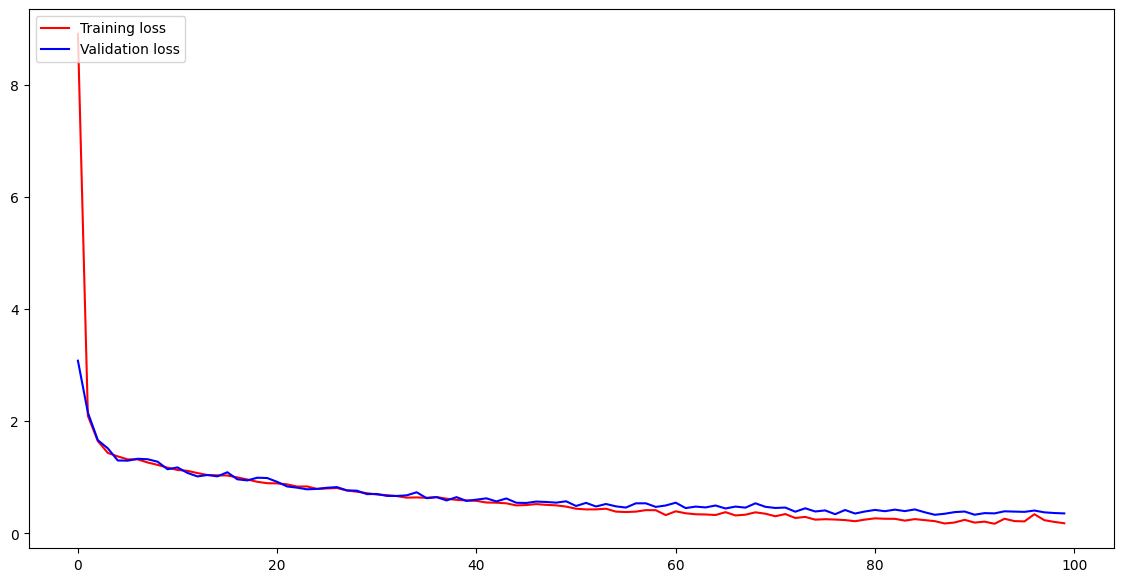

In [4]:
loss = results.history['loss']
val_loss = results.history['val_loss']
epochs = range(len(loss))
fig = plt.figure(figsize=(14,7))
plt.plot(epochs,loss,'r',label="Training loss")
plt.plot(epochs,val_loss,'b',label="Validation loss")
plt.legend(loc='upper left')
plt.show()

In [5]:
X_test = np.array(X_test)
Y_test = np.array(Y_test)
print(X_test.shape)
score = model.evaluate(X_test, Y_test, verbose = 1)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

(1145, 128, 128, 3)
36/36 [==============================] - 2s 41ms/step - loss: 0.3652 - accuracy: 0.9319
Test loss: 0.36517128348350525
Test accuracy: 0.9318777322769165


1/1 [==============================] - 1s 809ms/step


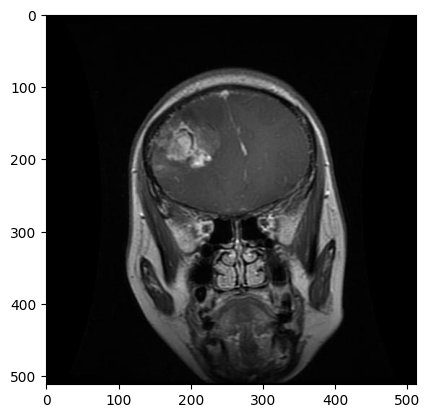

0


In [6]:
realimg = '/content/drive/MyDrive/BRTcom/Training/glioma/Tr-glTr_0000.jpg'
img1 = cv2.imread(realimg)
img1 = cv2.resize(img1,(128,128))
img1 =  np.array(img1)
img1 = img1.reshape(1,128,128,3)

prediction = model.predict(img1)
pred_val_1 = prediction.argmax()
n1 = pred_val_1.item()

img_plot = plt.imshow(mpimg.imread(realimg))
plt.show()
print(n1)
#pred_name(n1)

In [7]:
import tensorflow as tf

# Load the trained U-Net model
model = tf.keras.models.load_model('/content/BRAIN_TUMOR_CLASSIFIER_MODEL.h5')

# Load the input image
image = tf.keras.preprocessing.image.load_img('/content/drive/MyDrive/BRTcom/Training/glioma/Tr-glTr_0000.jpg', target_size=(256, 256))

image = image.resize((128, 128))

# Convert the image to a NumPy array
image = tf.keras.preprocessing.image.img_to_array(image)

# Expand the dimensions of the image array
image = tf.expand_dims(image, axis=0)

# Preprocess the input image
image = image / 255.0

# Pass the input image through the U-Net model to get the output
output = model.predict(image)

# Apply a threshold to the output to get the segmentation mask
segmentation_mask = tf.where(output > 0.5, 1, 0)

# Identify the tumor segment in the segmentation mask
tumor_segment = tf.where(segmentation_mask == 1)

print(tumor_segment)



1/1 [==============================] - 0s 266ms/step
tf.Tensor([[0 2]], shape=(1, 2), dtype=int64)
